&nbsp;

# Création du masque des côtes

---

&nbsp;

Implémentons la création du masque suivant la ligne des côtes présentes dans le jeu de donnée. Étant donné que les données COPERNICUS n'ont pas de données sur les points de terre (valeur NaN à la place), nous pouvons nous en servir à notre avantage pour déterminer les points d'océan voisins des points de terre.

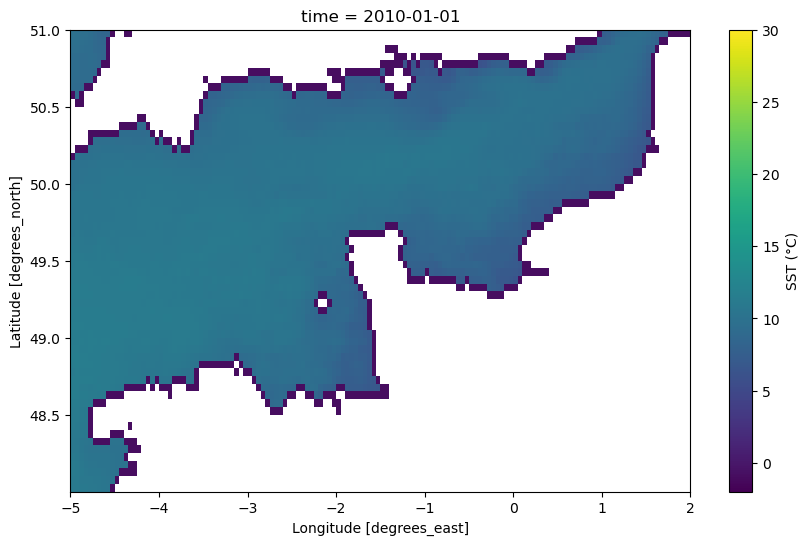

In [4]:
import numpy as np
import xarray as xr
from scipy.ndimage import binary_dilation

ds = xr.open_dataset('data/processed/sstCOPERNICUS20102019Processed.nc')

# We take a point in time of our clean dataset of SST
sstAt0 = ds['analysed_sst'].isel(time=0)

# We are getting NaN values to create a mask of land points
land = np.isnan(sstAt0.values)

# Then we create a land mask by inverting the ocean mask
ocean = ~land

# Using binary dilation to expand the land mask by one pixel and convert it as a boolean array
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.binary_dilation.html
landDilated = binary_dilation(land)

# If a pixel is ocean and next to land we dilated, it is a coastline pixel
coastMask = ocean & landDilated

# Creating a new xarray DataArray to store SST with coastline masked and we mark coastline points
dsCoastLine = sstAt0.copy()
dsCoastLine.values[coastMask] = -1
landDilated = binary_dilation(land)

dsCoastLine.plot(
    figsize=(10, 6),
    cmap='viridis',
    vmin=-2,
    vmax=30,
    cbar_kwargs={'label': 'SST (°C)'}
)

dsCoastLine.to_netcdf('data/features/sstCOPERNICUS20102019Coastline.nc')





